# Author: ZIATE Ayoub

# Exploratory data analysis
#### Read Data, analysing it and visualizing it.

In [ ]:
import pandas as pd
import numpy as np
import sys
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("creditcard.csv",sep=',')
print('Dimensions of the Dataset set:',df.shape)

Dimensions of the Dataset set: (284807, 31)


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


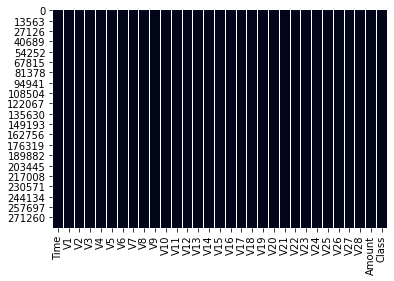

In [ ]:
#NA values
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
print('Class distribution dataset:')
print(df['Class'].value_counts())

Class distribution dataset:
0    284315
1       492
Name: Class, dtype: int64


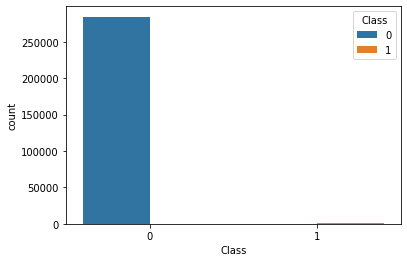

In [ ]:
sns.countplot(x=df.Class, hue=df.Class)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


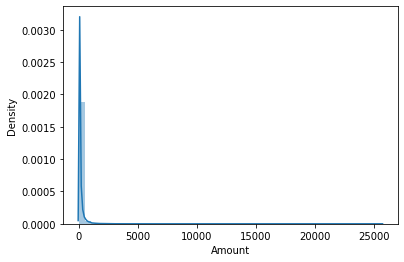

In [ ]:
sns.distplot(df.Amount)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


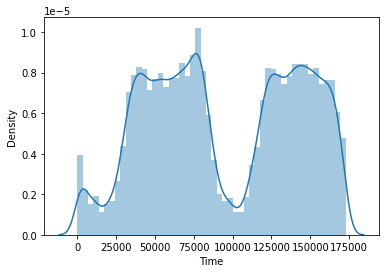

In [ ]:
sns.distplot(df.Time)

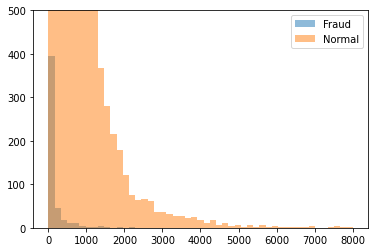

In [ ]:
#understand the importance of Amount feature
bins = np.linspace(0, 8000, 50)

plt.hist(df[df['Class']==1]['Amount'], bins, alpha=0.5, label='Fraud')
plt.hist(df[df['Class']==0]['Amount'], bins, alpha=0.5, label='Normal')
plt.legend(loc='upper right')
plt.ylim([0, 500])
plt.show()

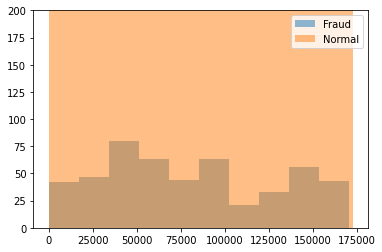

In [ ]:
#understand the importance of Time feature
bins = np.linspace(0, 200, 40)

plt.hist(df[df['Class']==1]['Time'],  alpha=0.5, label='Fraud')
plt.hist(df[df['Class']==0]['Time'],  alpha=0.5, label='Normal')
plt.legend(loc='upper right')
plt.ylim([0, 200])
plt.show()

***We can't detect which is the most important feature because we have a few number of Fraud dataset.***

# Data preparation
#### Prepare data for models - Standardization

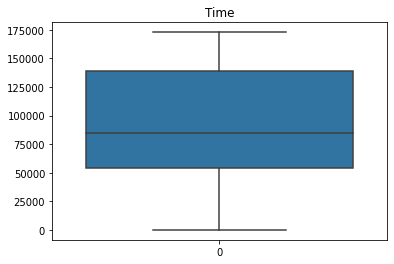

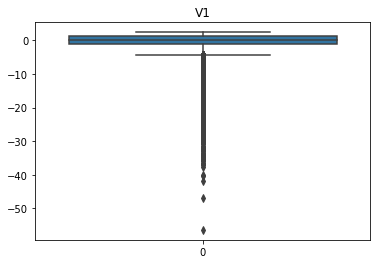

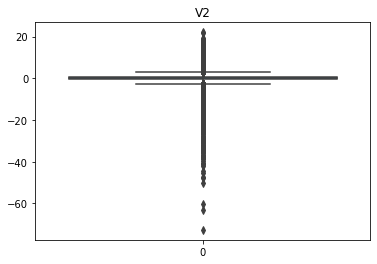

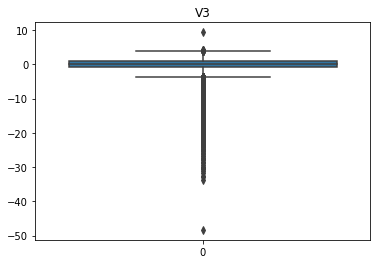

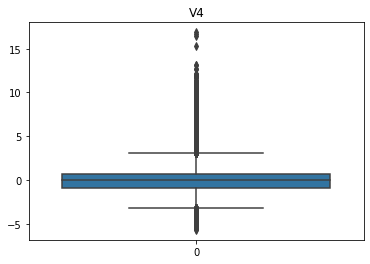

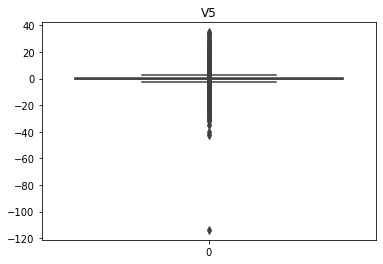

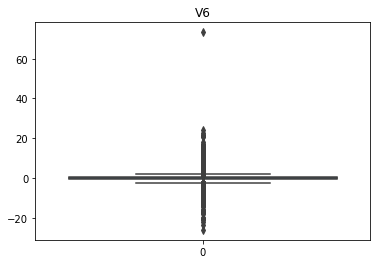

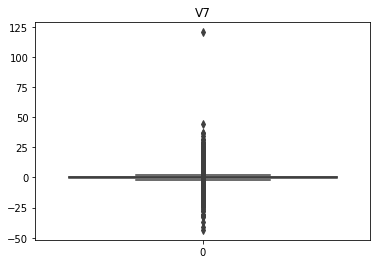

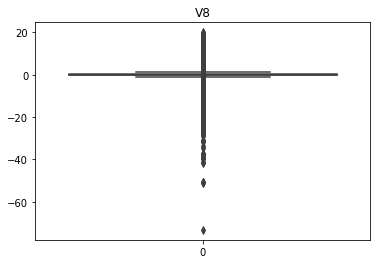

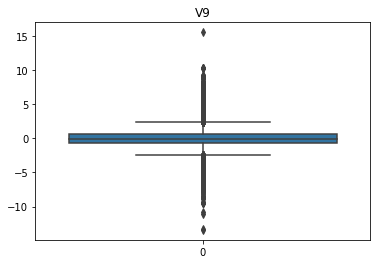

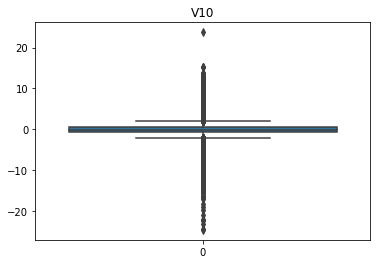

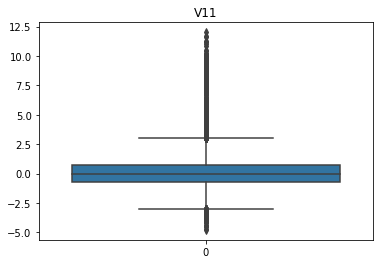

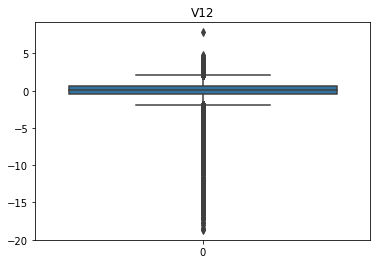

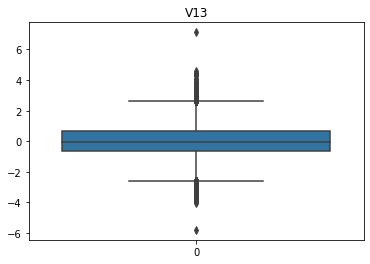

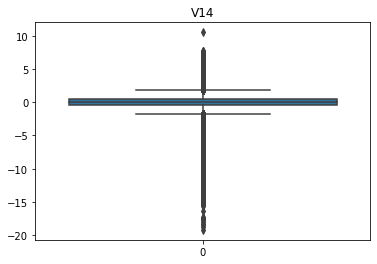

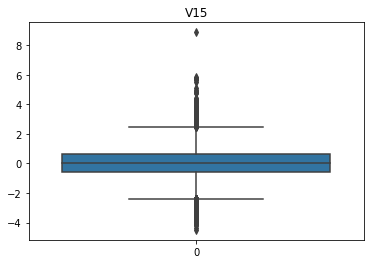

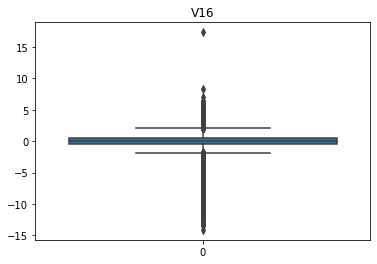

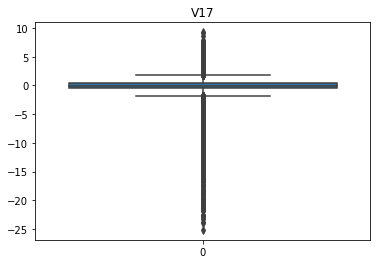

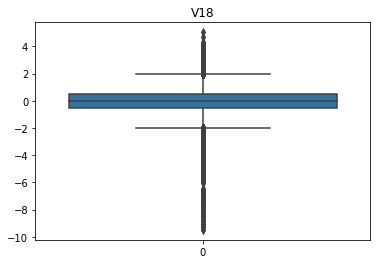

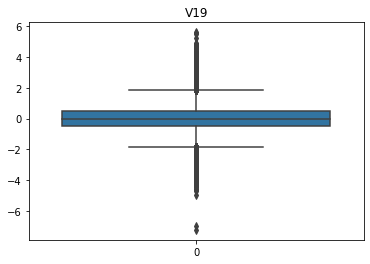

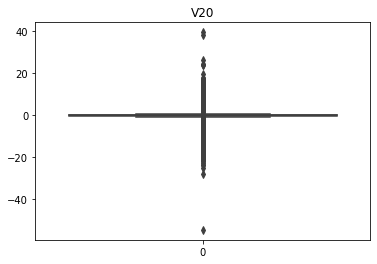

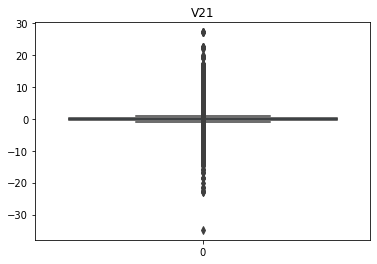

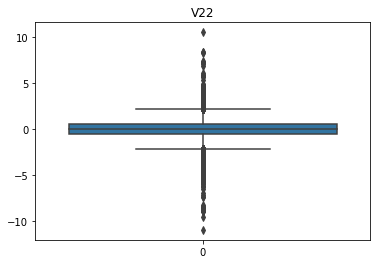

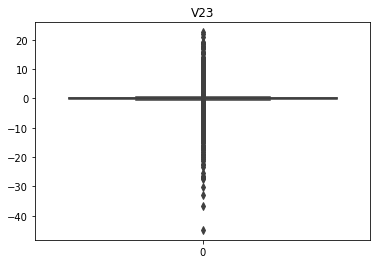

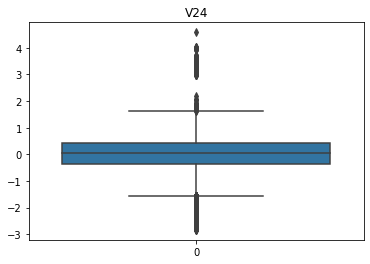

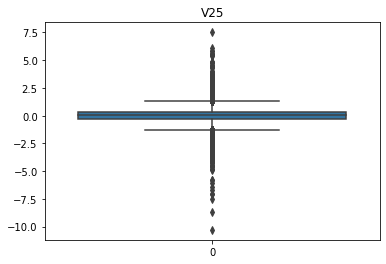

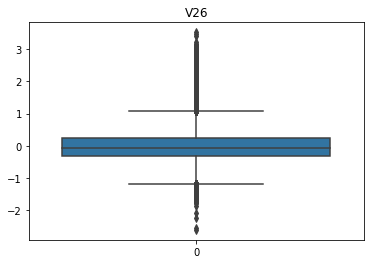

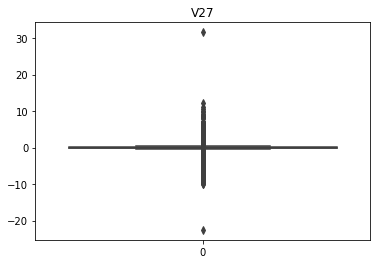

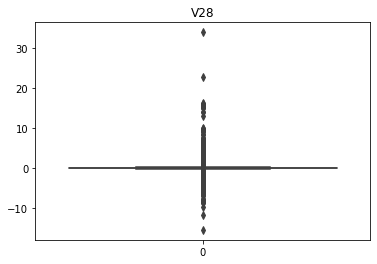

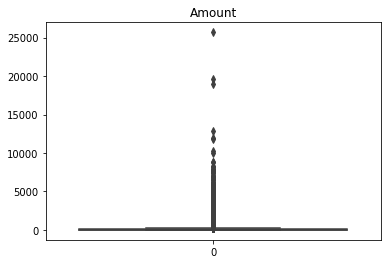

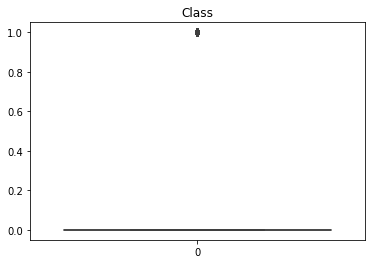

In [ ]:
#detecting outliers
for clmn in df.columns:
  ax = sns.boxplot(data=df[clmn])
  plt.title(clmn)
  plt.show(ax)

In [ ]:
#drop the outliers
df_new = df[(df.V1>=-50) & (df.V2>=-60) & (df.V3>=-40) & (df.V4<=15) & (df.V5>=-60) & (df.V6<=30) & (df.V7<=50) & (df.V8>=-60) & (df.V9<=13) & (df.V10<=20) & (df.V12<=6) & (df.V13<=6) & (df.V13>=-5) & (df.V14<10) & (df.V15<=7) & (df.V16<=10) & (df.V19>=-6) & (df.V20>=-40) & (df.V20<=30) & (df.V21>=-30) & (df.V23>=-40) & (df.V27<=16) & (df.V27>=-15) & (df.V28<=20) & (df.Amount<=15000) ]

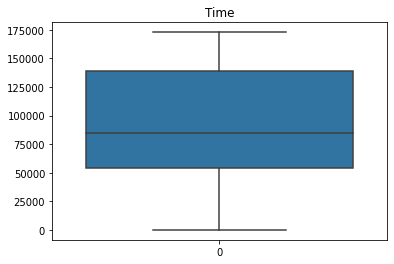

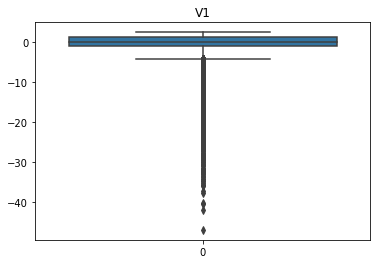

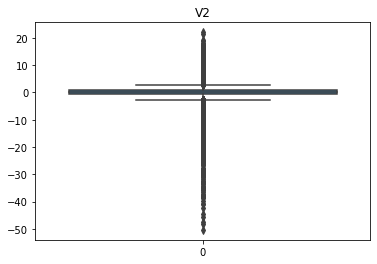

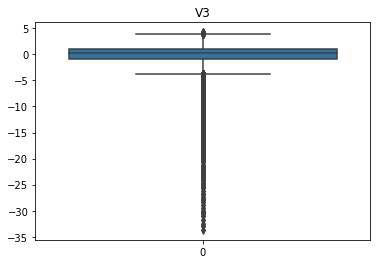

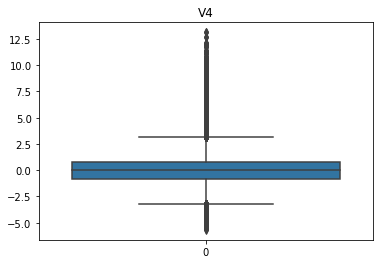

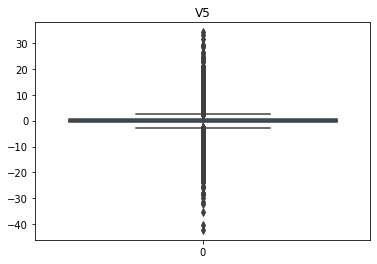

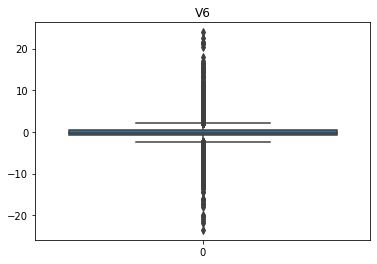

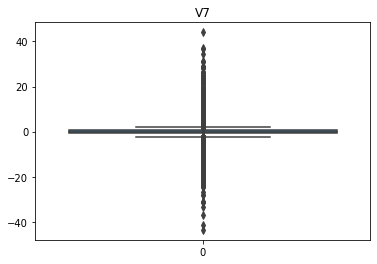

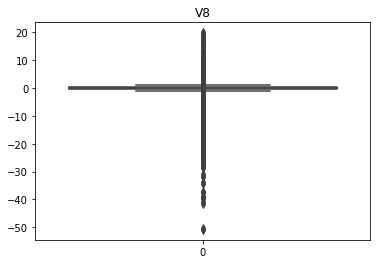

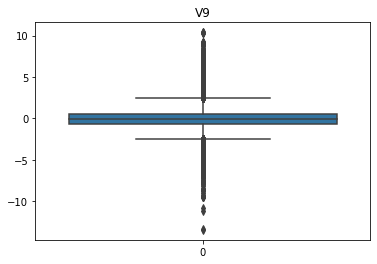

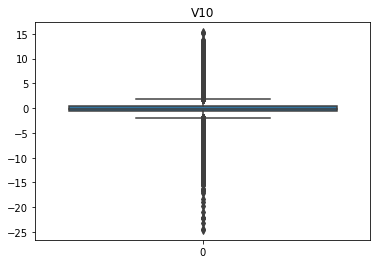

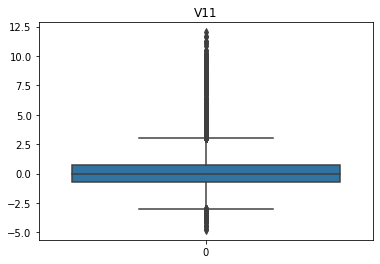

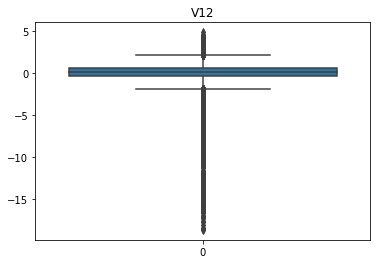

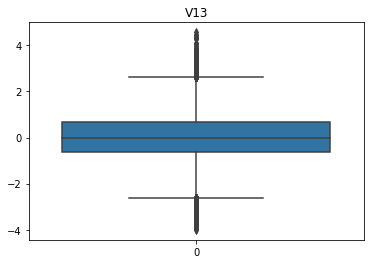

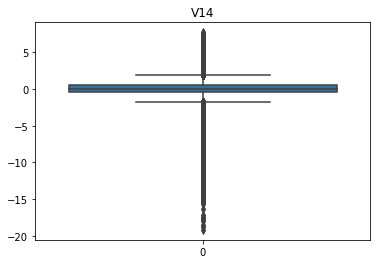

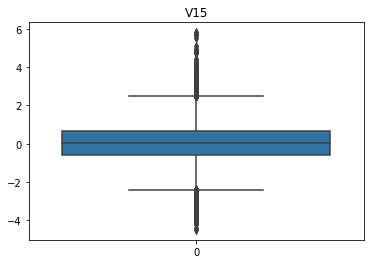

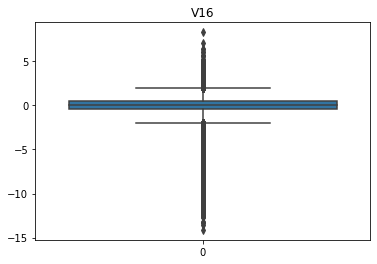

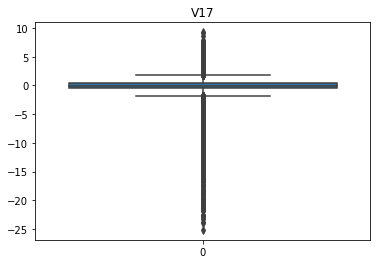

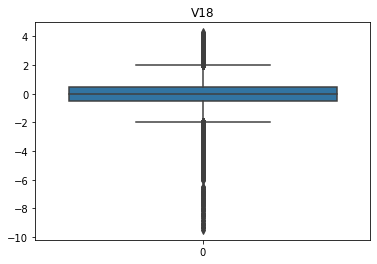

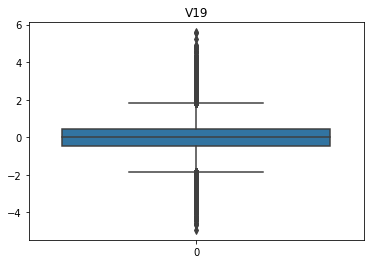

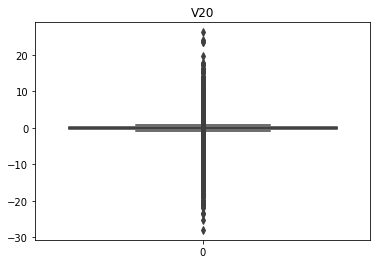

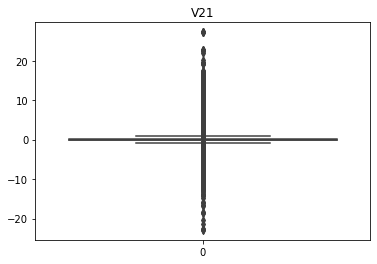

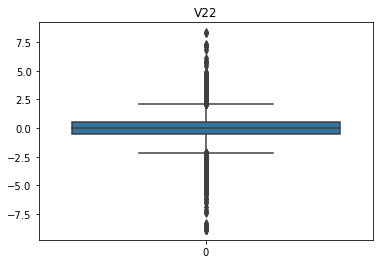

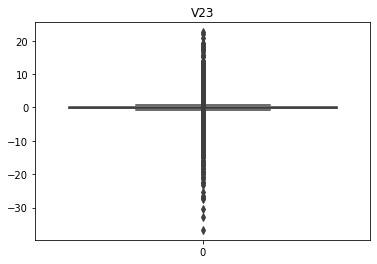

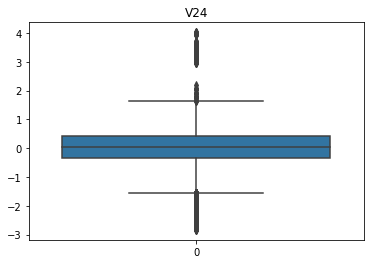

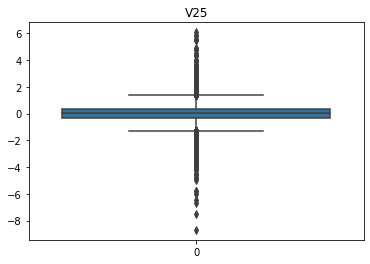

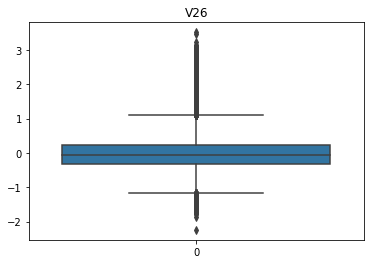

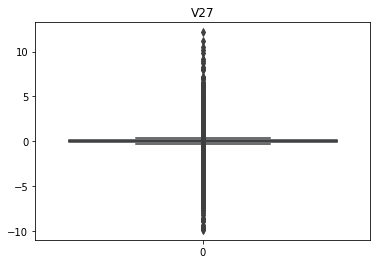

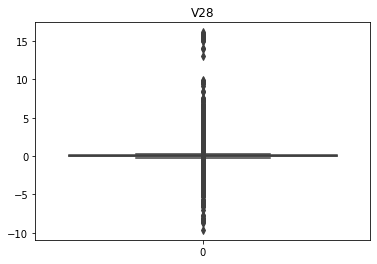

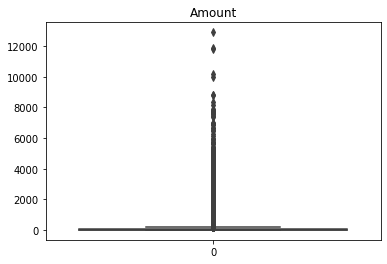

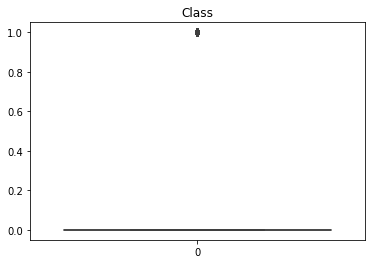

In [ ]:
for clmn in df_new.columns:
  ax = sns.boxplot(data=df_new[clmn])
  plt.title(clmn)
  plt.show(ax)

In [ ]:
df = df_new

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0445486908>]],
      dtype=object)

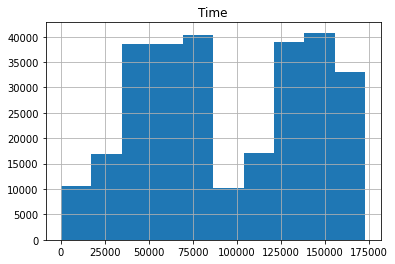

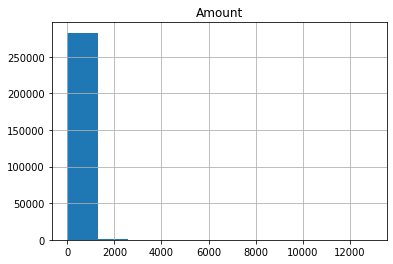

In [ ]:
df.hist(column='Time')
df.hist(column='Amount')

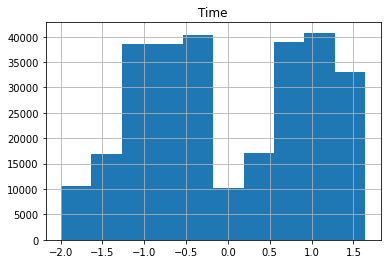

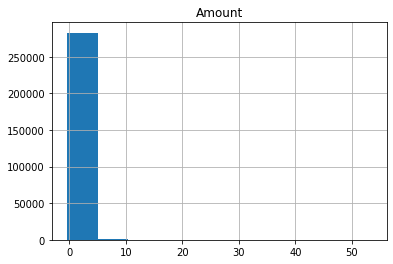

In [ ]:
# Time and Amount features standardization
from sklearn.preprocessing import StandardScaler

transform_clmn = ['Time', 'Amount']
for clmn in transform_clmn:
  scale = StandardScaler().fit(df[[clmn]])
  Time_stand = scale.transform(df[[clmn]])
  df[clmn]=Time_stand
  df.hist(column=clmn)


# Fraud detection
### We will build 3 Machine learning: SVM, Logistic regression and Random forest.
###Then we will compare their results.

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

data = df.drop('Class', axis=1)
target = df['Class']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=50) # 70% training and 30% test
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(199359, 30) (199359,)
(85440, 30) (85440,)


In [ ]:
print("Training data:")
print(y_train.value_counts())
print("Testing data:")
print(y_test.value_counts())

Training data:
0    199015
1       344
Name: Class, dtype: int64
Testing data:
0    85292
1      148
Name: Class, dtype: int64


In [ ]:
#impot libraries
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import time

In [ ]:
start_time = time.time()

# metrics storage
bars1 = []
bars2 = []
bars3 = []
bars4 = []
bars5 = []

# The 3 ML models 
models = []
models.append(('SVM', svm.SVC(kernel='linear')))
models.append(('LR', LogisticRegression(max_iter=100)))
models.append(('RF',RandomForestClassifier()))

#Build models and evaluations
for name, model in models:
  print(name, " results:")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))
  bars1.append(metrics.accuracy_score(y_test, y_pred))
  print("Precision = ", metrics.precision_score(y_test, y_pred))
  bars2.append(metrics.precision_score(y_test, y_pred))
  print("Recall = ", metrics.recall_score(y_test, y_pred))
  bars3.append(metrics.recall_score(y_test, y_pred))
  print("AUC = ", metrics.roc_auc_score(y_test, y_pred))
  bars4.append(metrics.roc_auc_score(y_test, y_pred))
  print("F1-score = ", metrics.f1_score(y_test, y_pred))
  bars5.append(metrics.f1_score(y_test, y_pred))

print("ML models takes --- %s seconds ---" % (time.time() - start_time))

SVM  results:
Accuracy =  0.9992977528089888
Precision =  0.8098591549295775
Recall =  0.777027027027027
AUC =  0.8883552337217393
F1-score =  0.7931034482758621
LR  results:
Accuracy =  0.9992860486891386
Precision =  0.865546218487395
Recall =  0.6959459459459459
AUC =  0.8478791775408105
F1-score =  0.7715355805243446
RF  results:
Accuracy =  0.9995786516853933
Precision =  0.9745762711864406
Recall =  0.777027027027027
AUC =  0.888495926869983
F1-score =  0.8646616541353384
ML models takes --- 439.034259557724 seconds ---


***Compare Metrics of the models***

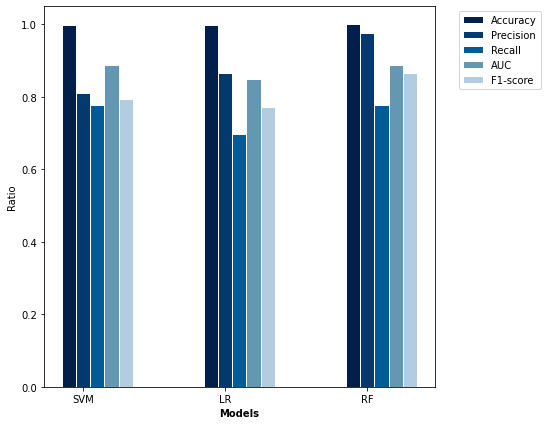

In [ ]:
# set width of bar
barWidth = 0.1
plt.figure(figsize=(7,7))

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
plt.bar(r1, bars1, color='#011f4b', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, bars2, color='#03396c', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r3, bars3, color='#005b96', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r4, bars4, color='#6497b1', width=barWidth, edgecolor='white', label='AUC')
plt.bar(r5, bars5, color='#b3cde0', width=barWidth, edgecolor='white', label='F1-score')
 
# Add models name on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Ratio')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SVM', 'LR', 'RF'])
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.show()